In [11]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from gpt.maps import Map25D_TM

cnames={'z':'z', 'r':'r', 'Ez':'Ez', 'Er':'Er', 'Bphi':'Bphi'}

In [14]:
cav = Map25D_TM('cav_7_cell', 'fields/7cell_2D.gdf', column_names=cnames, frequency=1.3e9)

Field map does not contain item "R"
Field map does not contain item "R"


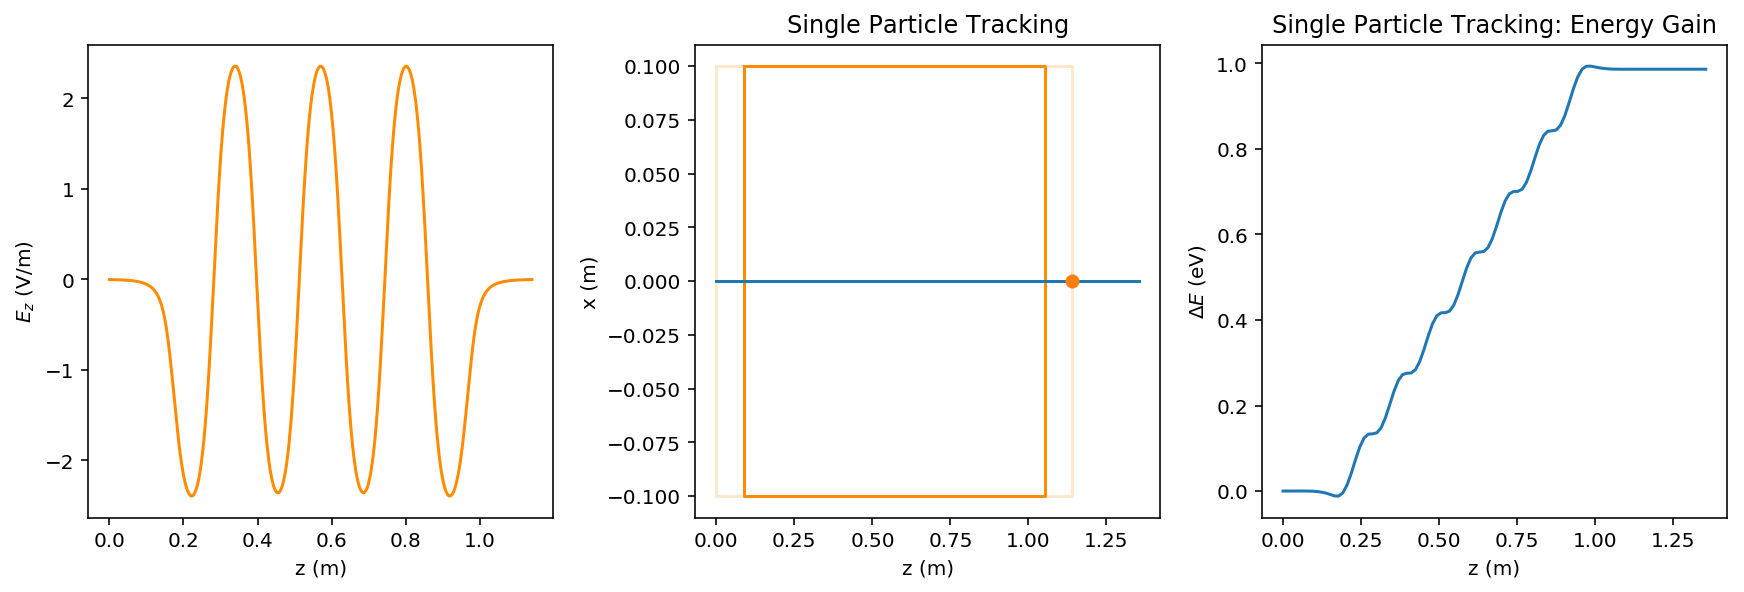

In [18]:
G = cav.track_on_axis(t=0, p=10e6, use_tempfile=False)

fig, ax = plt.subplots(1, 3, sharex='col',constrained_layout=True, figsize=(12,4))

cav.plot_field_profile(ax=ax[0])
cav.plot_floor(ax=ax[1])

ax[1].plot(G.stat('mean_z','tout'), G.stat('mean_x', 'tout'));
ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'), 'o');
ax[1].set_title('Single Particle Tracking')

ax[2].plot(G.stat('mean_z','tout'), G.stat('mean_energy', 'tout')-G.tout[0]['mean_energy']);
ax[2].set_xlabel('z (m)');
ax[2].set_ylabel('$\Delta E$ (eV)');
ax[2].set_title('Single Particle Tracking: Energy Gain');

CPU times: user 1.84 s, sys: 657 ms, total: 2.5 s
Wall time: 3.5 s


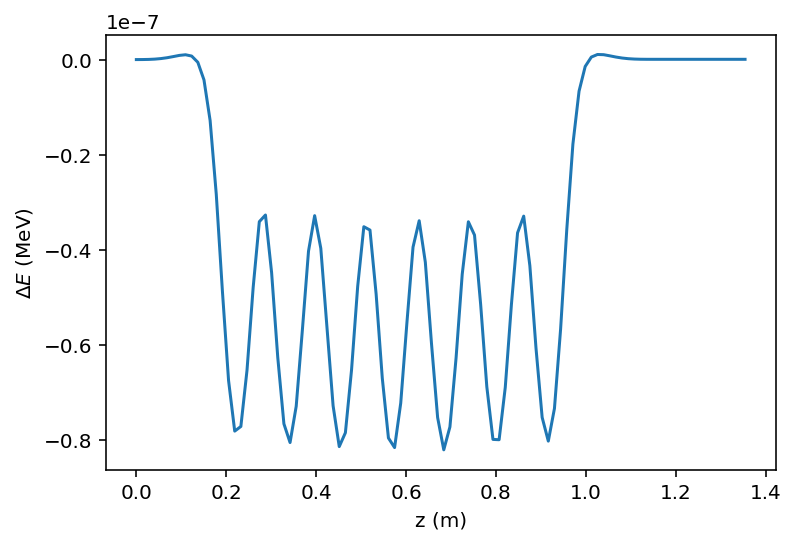

In [19]:
p=10e6
cav._scale=1
cav._relative_phase=-90

%time G=cav.autophase(t=0, p=p)

plt.plot(G.stat('mean_z','tout'), (G.stat('mean_energy', 'tout')-G.tout[0]['mean_energy'])/1e6);
plt.xlabel('z (m)');
plt.ylabel('$\Delta E$ (MeV)');